## Data Loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # layers of keras

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']

caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']

  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']

caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10t

In [2]:
df_tweets = pd.read_csv("/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv")
df_tweets[:10]

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [3]:
df_tweets.groupby(by="cyberbullying_type").count()

,tweet_text
cyberbullying_type,
age,7992
ethnicity,7961
gender,7973
not_cyberbullying,7945
other_cyberbullying,7823
religion,7998


## Data Cleaning
### Checking Missing Values

In [4]:
def check_missing_values(col):
    counter = 0
    for element in col:
        if element == True:
            counter += 1
    return counter

In [5]:
df_tweets.isnull().apply(lambda x: check_missing_values(x))

tweet_text            0
cyberbullying_type    0
dtype: int64

### Checking Duplicates

In [6]:
def check_duplicated_values(x):
    return x.duplicated().sum()

In [7]:
df_tweets.apply(lambda x: check_duplicated_values(x))

tweet_text             1675
cyberbullying_type    47686
dtype: int64

In [8]:
df_tweets.loc[:,["tweet_text"]].duplicated().sum()

1675

In [9]:
df_tweets = df_tweets.drop_duplicates(subset=['tweet_text'])

In [10]:
df_tweets.apply(lambda x: check_duplicated_values(x))

tweet_text                0
cyberbullying_type    46011
dtype: int64

In [11]:
df_tweets.groupby(by="cyberbullying_type").count()

,tweet_text
cyberbullying_type,
age,7992
ethnicity,7952
gender,7898
not_cyberbullying,7937
other_cyberbullying,6243
religion,7995


## Data Transformation
### Balancing the Dataset

In [12]:
df_tweets = df_tweets.groupby(by="cyberbullying_type").sample(n=1000, random_state=1)
print("Length: "+ str(len(df_tweets)))
df_tweets[:5]

Length: 6000


,tweet_text,cyberbullying_type
34044,She looks so beautiful and she’s has a very ki...,age
38234,My old high school bully just tried to menace ...,age
36306,From my experience PE teachers are bullies. I ...,age
36793,ew why is gun/poop girl trending literally go ...,age
37263,Lara Spencer is so unprofessional. She bullied...,age


In [13]:
df_tweets.groupby(by="cyberbullying_type").count()

,tweet_text
cyberbullying_type,
age,1000
ethnicity,1000
gender,1000
not_cyberbullying,1000
other_cyberbullying,1000
religion,1000


## Data Preprocessing

### One-Hot Encoding and Creation of Sets

In [14]:
cyberbullying_types = set(df_tweets['cyberbullying_type'].unique())
cyberbullying_types

{'age',
 'ethnicity',
 'gender',
 'not_cyberbullying',
 'other_cyberbullying',
 'religion'}

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_x_tv, df_x_test, df_y_tv, df_y_test = train_test_split(df_tweets['tweet_text'], df_tweets['cyberbullying_type'], test_size=0.20,random_state=42)

In [18]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_y_tv)
print("integer_encoded")
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("onehot_encoded")
print(onehot_encoded)
print("length: " + str(len(onehot_encoded)))

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
inverted

integer_encoded

[3 5 1 ... 5 5 0]

onehot_encoded

[[0. 0. 0. 1. 0. 0.]

 [0. 0. 0. 0. 0. 1.]

 [0. 1. 0. 0. 0. 0.]

 ...

 [0. 0. 0. 0. 0. 1.]

 [0. 0. 0. 0. 0. 1.]

 [1. 0. 0. 0. 0. 0.]]

length: 4800


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

  warnings.warn(


array(['religion'], dtype=object)

In [19]:
def label_decode(labels):
    decoding = np.argmax(labels, axis=1)
    return label_encoder.inverse_transform(decoding)

label_decode(onehot_encoded)

array(['not_cyberbullying', 'religion', 'ethnicity', ..., 'religion',
       'religion', 'age'], dtype=object)

In [20]:
df_x_train, df_x_valid, df_y_train, df_y_valid = train_test_split(df_x_tv, onehot_encoded, test_size=0.30,random_state=42)

In [21]:
df_x_train[:1]

23126    they're fundamentalists who are guilty of war ...
Name: tweet_text, dtype: object

## Modelling

In [22]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.001)

In [23]:
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=3000,output_mode='tf_idf',pad_to_max_tokens=True) # tf_idf
vectorize_layer.adapt(df_tweets.tweet_text)

In [24]:
classes_len = 6
vocab_size = len(vectorize_layer.get_vocabulary())

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=20),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(200, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(50, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(classes_len, kernel_regularizer=regularizer),
    tf.keras.layers.Softmax()
])

model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 text_vectorization (TextVec  (None, 3000)             1         

 torization)                                                     

                                                                 

 embedding (Embedding)       (None, 3000, 20)          60000     

                                                                 

 flatten (Flatten)           (None, 60000)             0         

                                                                 

 dense (Dense)               (None, 500)               30000500  

                                                                 

 dropout (Dropout)           (None, 500)               0         

                                                                 

 dense_1 (Dense)             (None, 200)               100200    

                                        

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

epoch = 15
batch = 30

In [27]:
history = model.fit(df_x_train, df_y_train, epochs=epoch, batch_size=batch, validation_data=(df_x_valid,df_y_valid))

Epoch 1/15

112/112 [==============================] - 31s 263ms/step - loss: 2.4153 - accuracy: 0.1783 - val_loss: 2.1312 - val_accuracy: 0.1535

Epoch 2/15

112/112 [==============================] - 30s 268ms/step - loss: 1.6318 - accuracy: 0.5286 - val_loss: 1.2445 - val_accuracy: 0.7569

Epoch 3/15

112/112 [==============================] - 29s 259ms/step - loss: 1.1661 - accuracy: 0.7673 - val_loss: 1.1160 - val_accuracy: 0.7986

Epoch 4/15

112/112 [==============================] - 29s 258ms/step - loss: 1.1142 - accuracy: 0.8071 - val_loss: 1.2450 - val_accuracy: 0.7993

Epoch 5/15

112/112 [==============================] - 29s 260ms/step - loss: 1.1366 - accuracy: 0.8387 - val_loss: 1.1973 - val_accuracy: 0.8049

Epoch 6/15

112/112 [==============================] - 30s 269ms/step - loss: 0.9839 - accuracy: 0.8655 - val_loss: 1.2183 - val_accuracy: 0.8000

Epoch 7/15

112/112 [==============================] - 31s 277ms/step - loss: 0.9960 - accuracy: 0.8839 - val_loss: 1.

### Visualization Generalization Results

In [28]:
import matplotlib.pyplot as plt

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric])
        ax[idx].legend([metric, 'val_' + metric])

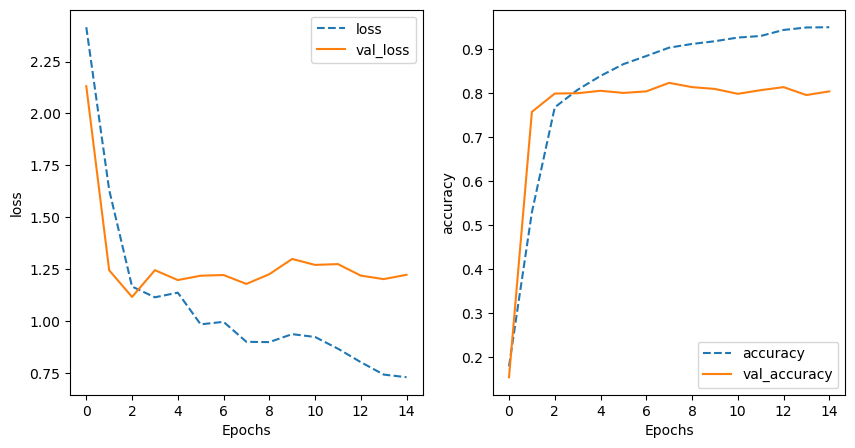

In [29]:
training_plot(['loss', 'accuracy'], history)

### Predictions

In [30]:
df_y_test_pred = model.predict(df_x_test)

38/38 [==============================] - 1s 35ms/step


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Funtion for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    classes.sort()
    tick_marks = np.arange(len(classes))    
    plt.figure(figsize=(4, 4),dpi=115)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [32]:
pred_result = label_decode(df_y_test_pred)

In [33]:
pred_result

array(['ethnicity', 'other_cyberbullying', 'age', ..., 'gender',
       'religion', 'ethnicity'], dtype=object)

In [34]:
df_y_test

40508            ethnicity
7105     not_cyberbullying
38429                  age
15111               gender
15993             religion
               ...        
10592               gender
45347            ethnicity
8129                gender
18323             religion
44287            ethnicity
Name: cyberbullying_type, Length: 1200, dtype: object

In [35]:
pred_result = label_decode(df_y_test_pred)
true_result = df_y_test
print(classification_report(y_true=true_result, y_pred=pred_result))

                     precision    recall  f1-score   support



                age       0.96      0.95      0.96       215

          ethnicity       0.94      0.98      0.96       222

             gender       0.85      0.78      0.82       176

  not_cyberbullying       0.57      0.46      0.51       204

other_cyberbullying       0.49      0.66      0.56       189

           religion       0.97      0.86      0.91       194



           accuracy                           0.79      1200

          macro avg       0.80      0.78      0.78      1200

       weighted avg       0.80      0.79      0.79      1200




Confusion matrix, without normalization


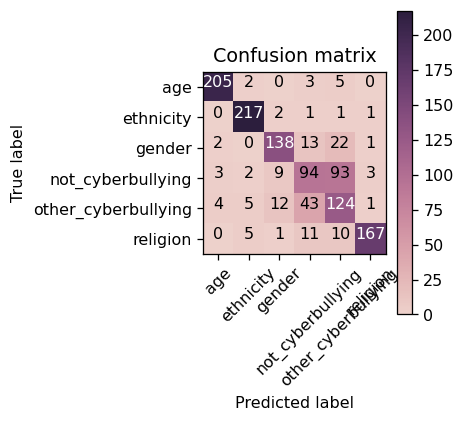

In [36]:
# plot confusion matrix
labels = ['age', 'ethnicity' ,'gender', 'not_cyberbullying' ,'other_cyberbullying','religion']
cm = confusion_matrix(y_true=true_result, y_pred=pred_result) 
plot_confusion_matrix(cm, classes=labels, title='Confusion matrix')

## Final Thoughts
The combination between textvectorization and embedding layer in this example produced more overfitting than using the embedding layer alone. Furthermore, it using tfidf instead of only counting them. However, in whatever case, the real challenge in the model is separate: not cyberbullying vs other cyberbullying. Because the category other_cyberbullying doesn't belong to some specific category. Its scope is bigger than the other categories, making it difficult to difference its key patterns.